<a href="https://colab.research.google.com/github/Kumarisimran626/Zomato_Restaurant_Clustering_and_Sentiment_Analysis/blob/main/S_k_ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='8px'><font color='Black'>**Project Name**    - <font color='red'>Zomato Restaurant Clustering and Sentiment Analysis






##### <font size='5px'>**Project Type**    - **UnSupervised Machine Learning**
##### **Contribution**    - Individual

##### **Name**    - Simran Kumari

# **Project Summary -**

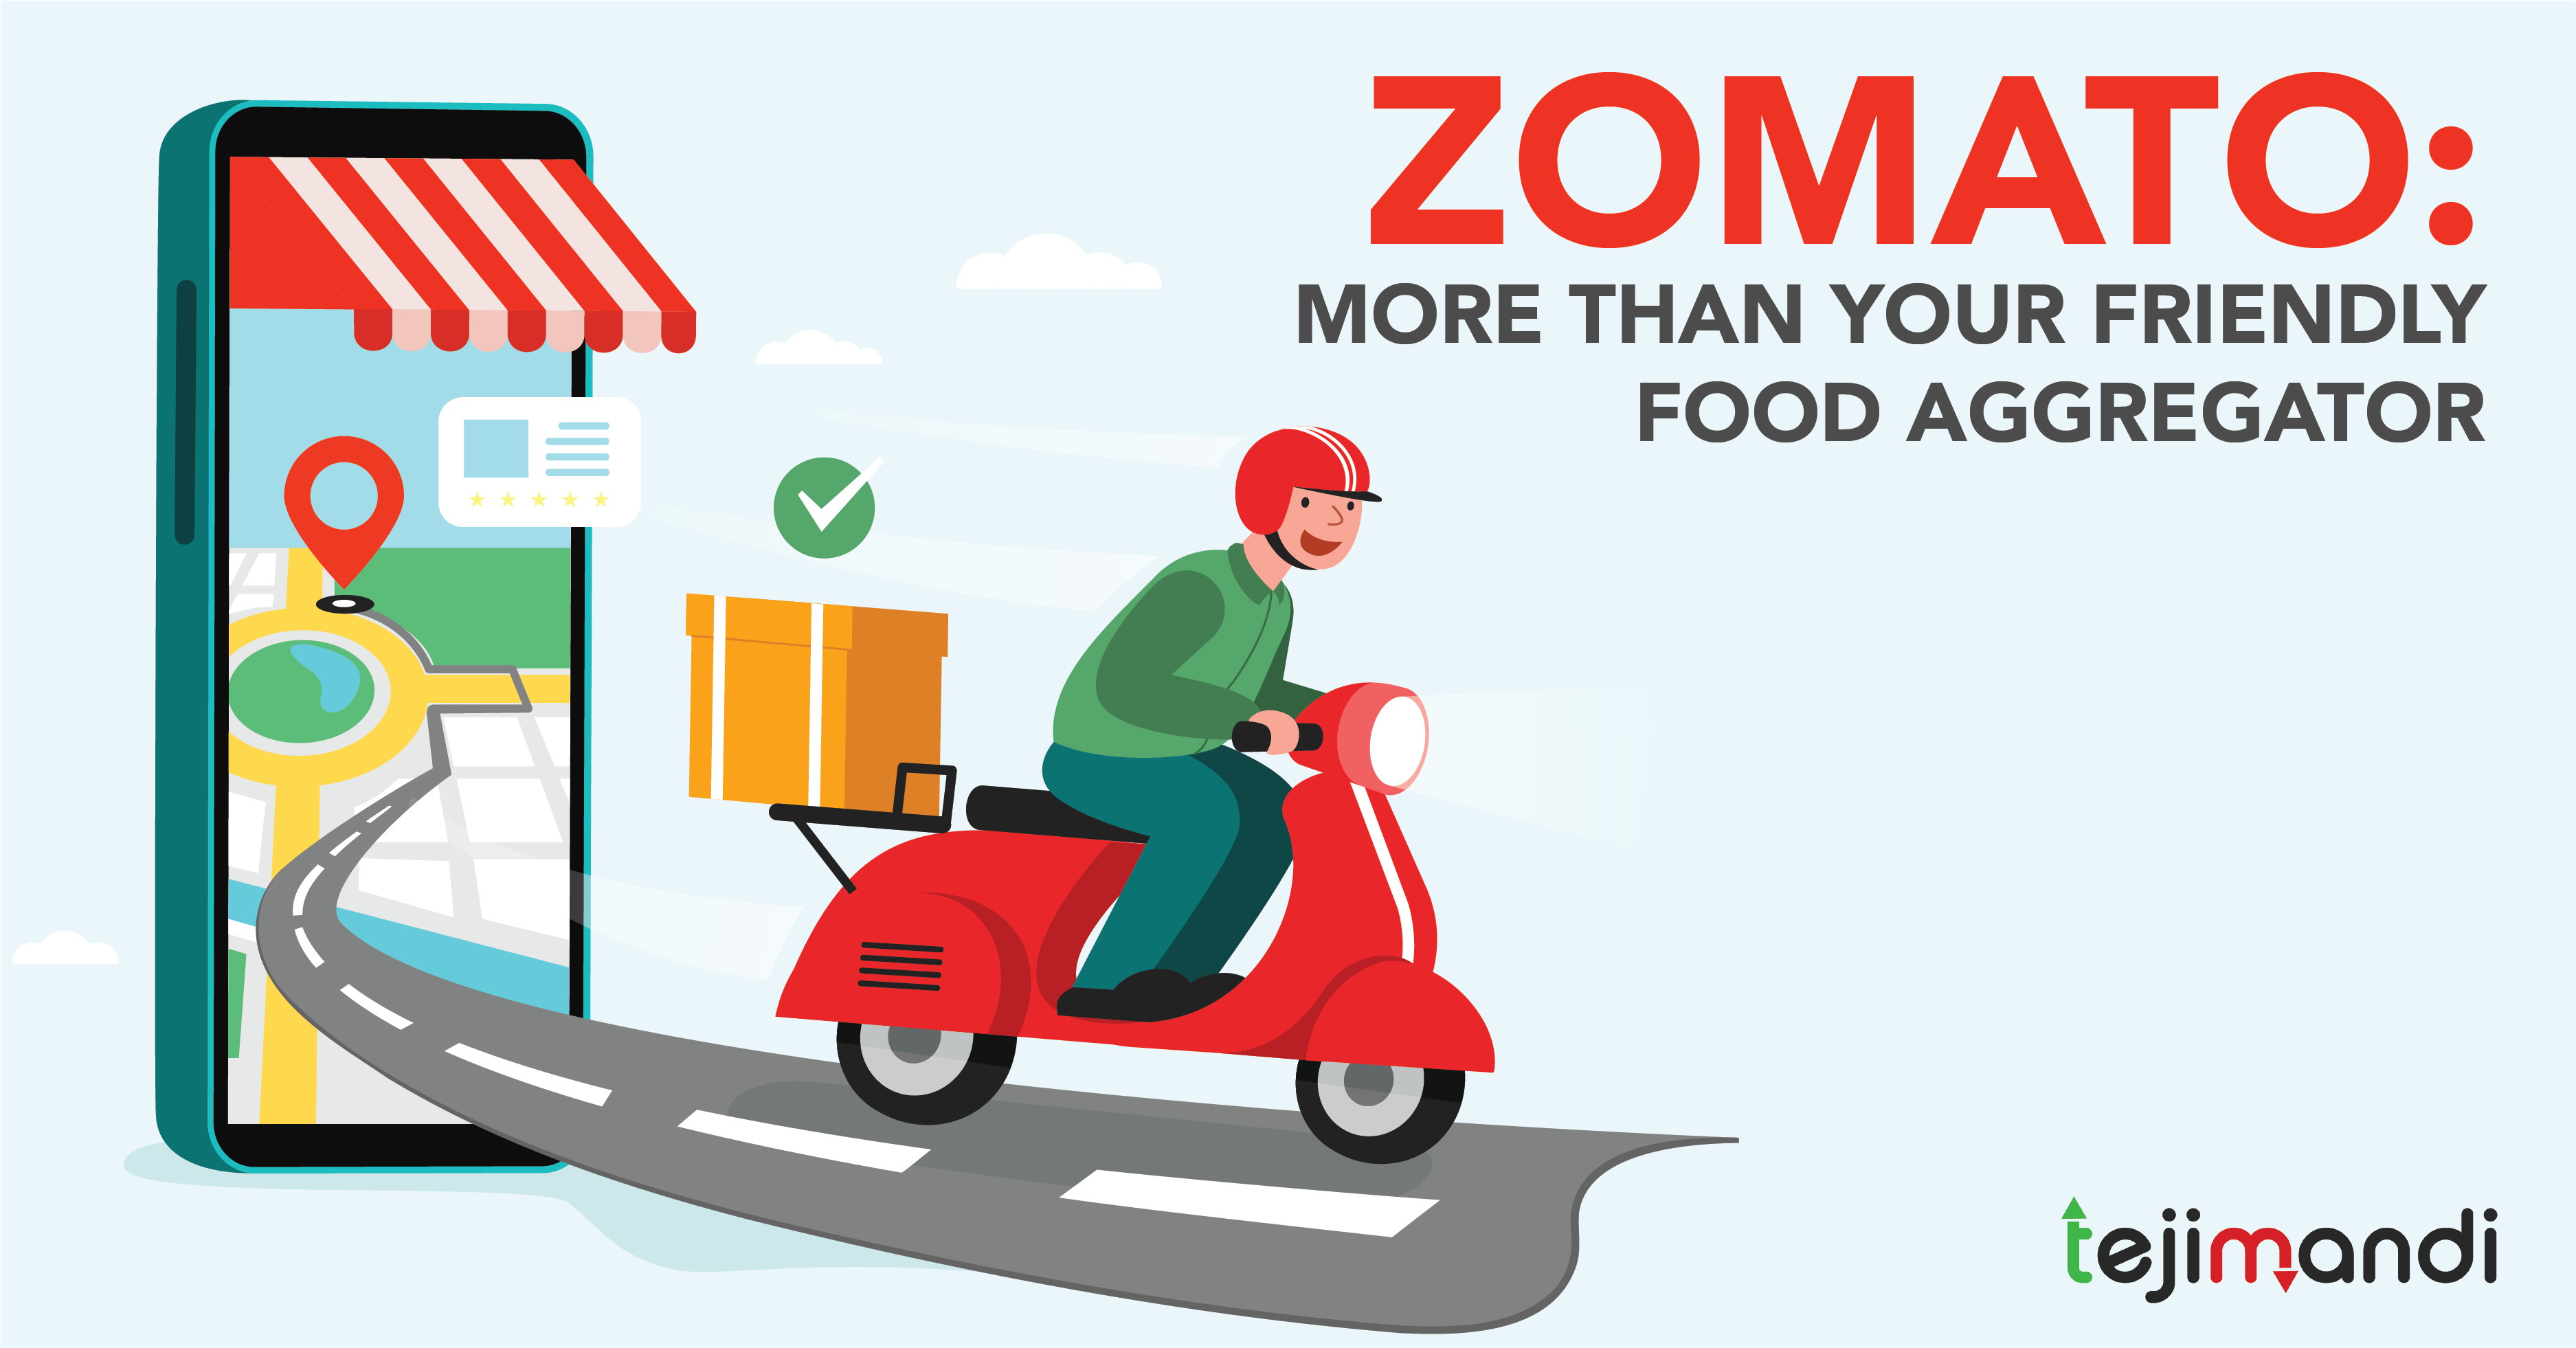

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# ***Let's Begin !***

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import seaborn as sns
import time
from wordcloud import WordCloud

from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#importing kmeans
from sklearn.cluster import KMeans

#Non-negative matrix Factorization
from sklearn.decomposition import NMF

#principal component analysis
from sklearn.decomposition import PCA


#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

#importing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
#for tokenization
from nltk.tokenize import word_tokenize
# for POS tagging(Part of speech in NLP sentiment analysis)
nltk.download('averaged_perceptron_tagger')

#import stemmer
from nltk.stem.snowball import SnowballStemmer

#import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
meta_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant reviews.csv')

In [4]:
# observing dataset
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
#Reviews Dataset First Look
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f'Total observations for Zomato restaurant names and metadata : {meta_df.shape} ')
print(f'Total observations for Zomato restaurant reviews : {reviews_df.shape} ')

Total observations for Zomato restaurant names and metadata : (105, 6) 
Total observations for Zomato restaurant reviews : (10000, 7) 


### Dataset Information

In [9]:
#Restaurant Names and Metadata Dataset Info
meta_df.info()
print('\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB




As we can see there are 6 attributes for 105 unique restaurants are provided, out of which Collections column has 51 Null values, and Timings has 1 Null value.

In [8]:
#Restaurant Reviews Dataset Info
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


Review Dataset has 10000 entries of reviews with 6 attributes for each reviews. Except Pictures, every column has Null values, although the Null value fraction is less than 1%.

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
duplicates_meta = meta_df.duplicated().sum()
print(f'Zomato Restaurant Names and Metadata have {duplicates_meta} duplicates')
duplicates_rv = reviews_df.duplicated().sum()
print(f'Zomato Restaurant reviews have {duplicates_rv} duplicates')

Zomato Restaurant Names and Metadata have 0 duplicates
Zomato Restaurant reviews have 36 duplicates


In [11]:
reviews_df[reviews_df.duplicated()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count for Names and metadata
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

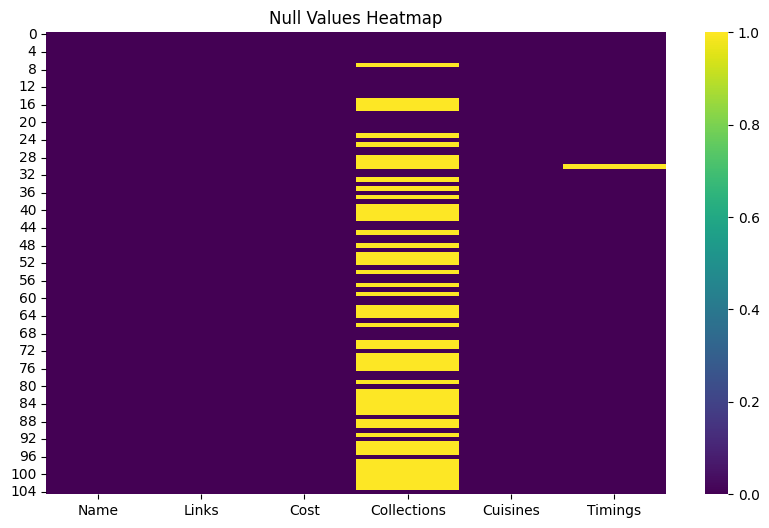

In [13]:
# Visualizing the missing values
# Create a heatmap of null values
plt.figure(figsize=(10, 6))
sns.heatmap(meta_df.isnull(), cmap='viridis', annot=False)
plt.title('Null Values Heatmap')
plt.show()

In [14]:
# Missing Values/Null Values Count for reviews data
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

### What did you know about your dataset?

**Restaurant Dataset**
- This dataset contains a total of 105 records, each featuring six distinct attributes.

- Some of the attributes, like 'collection' and 'timing', have missing values.

- There are no repeated records in this dataset; all data points are unique.

- The 'cost' attribute, which indicates prices, is stored as a string (object data type) because the values include commas.
- Similarly, the 'timing' attribute, which details the operating hours of the restaurants, is stored as a string because it is formatted as text.

**Review Dataset**

- This dataset includes 10,000 entries spread across seven different attributes.
- All attributes except for 'picture' and 'restaurant' have some missing values.
- There are 36 repeated records related to two specific restaurants, American Wild Wings and Arena Eleven, and these duplicates mainly consist of missing values.

- The 'rating' attribute, which uses a scale to evaluate something, is currently stored as a string and should be converted to an integer for proper analysis.
- The 'timing' attribute, which indicates when the review was posted, is also stored as a string and should be reformatted into a datetime type to ensure accurate temporal analysis.

## ***2.  Variables Understanding***

In [15]:
# Restaurant Metadata Dataset Columns
meta_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [16]:
#Reviews Dataset Columns
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [17]:
# Restaurant Metadata Dataset Describe
meta_df.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [18]:
#Reviews Dataset Describe
reviews_df.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable in restuarent data.
for column in meta_df.columns:
    unique_values = meta_df[column].unique()
    print(f"The unique values of {column} are: {unique_values}")

The unique values of Name are: ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land - Bar & Kitchen'
 'Owm Nom Nom' 'Ulavacharu' '

In [20]:
# Check Unique Values for each variable in reviews data.
for column in reviews_df.columns:
    unique_values = reviews_df[column].unique()
    print(f"The unique values of {column} are: {unique_values}")

The unique values of Restaurant are: ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land - Bar & Kitchen'
 'Owm Nom Nom' 'Ulavach

In [21]:
# Check Unique Values for each variable for reviews
for i in reviews_df.columns.tolist():
  print("No. of unique values in ",i,"is",reviews_df[i].nunique(),".")

No. of unique values in  Restaurant is 100 .
No. of unique values in  Reviewer is 7446 .
No. of unique values in  Review is 9364 .
No. of unique values in  Rating is 10 .
No. of unique values in  Metadata is 2477 .
No. of unique values in  Time is 9782 .
No. of unique values in  Pictures is 36 .


## 3. ***Data Wrangling***

In [22]:
# Write your code to make your dataset analysis ready.
resta_df = meta_df.copy()
review = reviews_df.copy()

In [23]:
#Checking unique values of cost
resta_df['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)



*   Cost Values have commas in the values, so the format of the Cost values need to change.
*   The Links Column is of no use, it is just an information.
*   Collections has more than 50% Null values, So the column needs to be dropped.




In [27]:
#top 5 lowest price restaurants
resta_df.nsmallest(5, 'Cost')[['Name', 'Cost']]

,Name,Cost
23,Amul,150
89,Mohammedia Shawarma,150
29,Hunger Maggi Point,200
54,Asian Meal Box,200
59,KS Bakers,200


In [24]:
# changing the data type of the cost function
resta_df['Cost'] = resta_df['Cost'].str.replace(",","").astype('int64')

In [26]:
#top 5 costlier restaurant
resta_df.nlargest(5, 'Cost')[['Name', 'Cost']]


,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
18,10 Downing Street,1900
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
91,Cascade - Radisson Hyderabad Hitec City,1800


In [28]:
#max restaurants that share same price
same_price_df = resta_df.groupby('Cost')['Name'].agg(['count', lambda x: x.tolist()]).reset_index()
same_price_df.columns = ['Cost', 'Total_Restaurant','Name of Restaurants']
same_price_df = same_price_df.sort_values('Total_Restaurant', ascending=False).head(5)
print(same_price_df)


    Cost  Total_Restaurant                                Name of Restaurants
7    500                13  [eat.fit, KFC, Kritunga Restaurant, Karachi Ba...
9    600                10  [Behrouz Biryani, Karachi Cafe, Hyderabad Chef...
11   700                 8  [Marsala Food Company, Green Bawarchi Restaura...
18  1200                 7  [Over The Moon Brew Company, The Glass Onion, ...
16  1000                 6  [Hyper Local, Tiki Shack, Pista House, La La L...


In [29]:
#Restaurants which has max price
same_price_df.nlargest(5, 'Cost')

,Cost,Total_Restaurant,Name of Restaurants
18,1200,7,"[Over The Moon Brew Company, The Glass Onion, ..."
16,1000,6,"[Hyper Local, Tiki Shack, Pista House, La La L..."
11,700,8,"[Marsala Food Company, Green Bawarchi Restaura..."
9,600,10,"[Behrouz Biryani, Karachi Cafe, Hyderabad Chef..."
7,500,13,"[eat.fit, KFC, Kritunga Restaurant, Karachi Ba..."


In [30]:
# storing all the cusines
cuisine_value_list = resta_df['Cuisines'].str.split(', ').apply(lambda x: [cuisine.strip() for cuisine in x])


In [33]:
from collections import Counter

# converting the dict to a data frame
cuisine_counter = Counter([cuisine for cuisine_names in cuisine_value_list for cuisine in cuisine_names])
cuisine_df = pd.DataFrame.from_dict(cuisine_counter, orient='index', columns=['Number of Restaurants']).reset_index().rename(columns={'index': 'Cuisine'})
top_5_cuisines = cuisine_df.sort_values('Number of Restaurants', ascending=False).head(5)


In [39]:
print(cuisine_counter)

Counter({'North Indian': 61, 'Chinese': 43, 'Continental': 21, 'Biryani': 16, 'Asian': 15, 'Fast Food': 15, 'Italian': 14, 'Desserts': 13, 'South Indian': 9, 'Bakery': 7, 'Kebab': 6, 'American': 6, 'Mughlai': 6, 'Andhra': 6, 'Cafe': 6, 'Mediterranean': 5, 'Beverages': 5, 'Burger': 5, 'Salad': 5, 'European': 4, 'Seafood': 4, 'Sushi': 4, 'Hyderabadi': 4, 'Momos': 4, 'Thai': 3, 'Ice Cream': 2, 'Street Food': 2, 'BBQ': 2, 'Finger Food': 2, 'Japanese': 2, 'Arabian': 2, 'Modern Indian': 2, 'Goan': 1, 'Healthy Food': 1, 'Lebanese': 1, 'Mexican': 1, 'Juices': 1, 'Spanish': 1, 'Wraps': 1, 'Indonesian': 1, 'Pizza': 1, 'North Eastern': 1, 'Mithai': 1, 'Malaysian': 1})


In [40]:
print(top_5_cuisines)

         Cuisine  Number of Restaurants
5   North Indian                     61
0        Chinese                     43
1    Continental                     21
6        Biryani                     16
18     Fast Food                     15


In [41]:
# spliting the cusines and storing in list
Collections_value_list = resta_df['Collections'].dropna().apply(lambda x: [collection.strip() for collection in x.split(', ')])
print(Collections_value_list)


0      [Food Hygiene Rated Restaurants in Hyderabad, ...
1                                  [Hyderabad's Hottest]
2                   [Great Buffets, Hyderabad's Hottest]
3                               [Late Night Restaurants]
4      [Best Bars & Pubs, Food Hygiene Rated Restaura...
5      [Sunday Brunches, Corporate Favorites, Great B...
6          [Food Hygiene Rated Restaurants in Hyderabad]
8      [Great Buffets, Live Sports Screenings, Best B...
9                                      [Frozen Delights]
10       [Street Food, Veggie Friendly, Pocket Friendly]
11                                    [Barbecue & Grill]
12                                       [Great Buffets]
13     [Corporate Favorites, Happy Hours, Live Sports...
14     [Barbecue & Grill, Great Buffets, Corporate Fa...
18                                  [Trending This Week]
19                                  [Trending This Week]
20                                     [Veggie Friendly]
21                      [Great 

In [42]:
# converting the dict to a data frame
collections_counter = Counter(collection for collections in Collections_value_list for collection in collections)
Collections_df = pd.DataFrame.from_dict(collections_counter, orient='index', columns=['Number of Restaurants']).reset_index().rename(columns={'index': 'Tags'})

#top 5 collection
Collections_df.nlargest(5,'Number of Restaurants')

,Tags,Number of Restaurants
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6


**Reviews :**

In [48]:
# to change data type for rating checking values
review.Rating.value_counts()

Rating
5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: count, dtype: int64

In [49]:
#There is on rating value with string format
review[(review['Rating']=='Like')].head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1


In [50]:
# converting it to 0 since no rating is 0 then to mean
review.loc[review['Rating'] == 'Like'] = 3.6

#changing data type for rating in review data
review['Rating']= review['Rating'].astype('float64')


In [62]:
print(review['Time'].head())
review['Time'] = pd.to_datetime(review['Time'], format='%m/%d/%Y %H:%M', errors='coerce')
review['Review_Year'] = review['Time'].dt.year
review['Review_Month'] = review['Time'].dt.month
review['Review_Hour'] = review['Time'].dt.hour


0    5/25/2019 15:54
1    5/25/2019 14:20
2    5/24/2019 22:54
3    5/24/2019 22:11
4    5/24/2019 21:37
Name: Time, dtype: object


In [63]:
review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0


In [55]:
#Average rate of prefered restaurants
avg_hotel_rating = review.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

,Restaurant,Rating,Total_Review
0,3.6,3.60,1
1,10 Downing Street,3.80,100
2,13 Dhaba,3.48,100
3,"3B's - Buddies, Bar & Barbecue",4.76,100
4,AB's - Absolute Barbecues,4.88,100
...,...,...,...
96,Urban Asia - Kitchen & Bar,3.65,100
97,Yum Yum Tree - The Arabian Food Court,3.56,100
98,Zega - Sheraton Hyderabad Hotel,4.45,100
99,Zing's Northeast Kitchen,3.65,100


In [56]:
#usless data
review[review['Restaurant'] == 3.6]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,3.6,3.6,3.6,3.6,3.6,3.6,3.6


In [64]:
#top 5 most prefered or rated restaurant
avg_hotel_rating.nlargest(5,'Rating')

,Restaurant,Rating,Total_Review
4,AB's - Absolute Barbecues,4.88,100
12,B-Dubs,4.81,100
3,"3B's - Buddies, Bar & Barbecue",4.76,100
68,Paradise,4.70,100
36,Flechazo,4.66,100


In [65]:
#top 5 lowest rated restaurant
avg_hotel_rating.nsmallest(5,'Rating')

,Restaurant,Rating,Total_Review
42,Hotel Zara Hi-Fi,2.400,100
11,Asian Meal Box,2.580,100
67,Pakwaan Grand,2.710,100
58,Mathura Vilas,2.820,100
15,Behrouz Biryani,2.825,100


In [66]:
# Checking the most followed critic
most_followed_reviewer = review.groupby('Reviewer').agg({'Reviewer_Total_Review':'max',
                                                        'Reviewer_Followers':'max',
                                                        'Rating':'mean'}).reset_index().rename(
                                                            columns={'Rating':'Average_Rating_Given'}
                                                        ).sort_values('Reviewer_Followers', ascending = False)
print(most_followed_reviewer[:5])

               Reviewer  Reviewer_Total_Review  Reviewer_Followers  \
5464    Satwinder Singh                  186.0             13410.0   
1702         Eat_vth_me                   60.0             13320.0   
5236       Samar Sardar                    8.0             11329.0   
1788  Foodies Hyderabad                   31.0              9494.0   
6230           Srinivas                   34.0              7628.0   

      Average_Rating_Given  
5464              3.666667  
1702              5.000000  
5236              3.500000  
1788              4.500000  
6230              3.714286  


In [67]:
#finding which year prefered to show maximum
hotel_year = review.groupby('Review_Year')['Restaurant'].apply(lambda x: x.tolist()).reset_index()
hotel_year['Count']= hotel_year['Restaurant'].apply(lambda x: len(x))
print(hotel_year)

   Review_Year                                         Restaurant  Count
0       2016.0  [Labonel, Labonel, Labonel, Labonel, Labonel, ...     43
1       2017.0  [KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...    213
2       2018.0  [Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...   4903
3       2019.0  [Beyond Flavours, Beyond Flavours, Beyond Flav...   4802


In [68]:
#merging both data frames
resta_df = resta_df.rename(columns = {'Name':'Restaurant'})
merged_df = resta_df.merge(review, on = 'Restaurant')
merged_df.shape


(9999, 17)

In [69]:
#Price point of restaurants
price_point = merged_df.groupby('Restaurant').agg({'Rating':'mean',
        'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})

In [70]:
#price point for high rated restaurants
price_point.nlargest(5,'Rating')

,Restaurant,Rating,Price_Point
3,AB's - Absolute Barbecues,4.88,1500.0
11,B-Dubs,4.81,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.0
67,Paradise,4.70,800.0
35,Flechazo,4.66,1300.0


In [71]:
#price point for lowest rated restaurants
price_point.nsmallest(5,'Rating')

,Restaurant,Rating,Price_Point
41,Hotel Zara Hi-Fi,2.400,400.0
10,Asian Meal Box,2.580,200.0
66,Pakwaan Grand,2.710,400.0
57,Mathura Vilas,2.820,500.0
14,Behrouz Biryani,2.825,600.0


In [72]:
#Rating count by reviewer
rating_count_df = pd.DataFrame(review['Reviewer'].value_counts().reset_index()).rename(columns={'index': 'Reviewer', 'Reviewer': 'Rating_Count'})
rating_count_df.head(5)


,Rating_Count,count
0,Ankita,13
1,Parijat Ray,13
2,Kiran,12
3,Vedant Killa,11
4,Jay Mehta,11
